## Diabetes Predection
### Team 3 Members:
  
 - Mohamed Hany Mohamed Fadel 21P0299
 - Mohamed Ahmed Esmat 21P0144
 - Youssef Mahmoud Hassan 21P0130
 - Kareem Ahmed Sameer 21P0096
 - Saifeldin Mohamed Hatem 21P0186
 - Basel Ashraf Fikry 22P0122

## Import Needed Libraries

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## Let's check for the data attributes

 Dataset Attributes:
  
 - `ID`: Unique identifier for each record.
 - `No_Pation`: Patient number or identifier.
 - `Gender`: Gender of the patient (e.g., Male, Female).
 - `AGE`: Age of the patient.
 - `Urea`: Urea level in the blood.
 - `Cr`: Creatinine level in the blood.
 - `HbA1c`: Hemoglobin A1c level, indicating average blood sugar levels over the past 2-3 months.
 - `Chol`: Cholesterol level in the blood.
 - `TG`: Triglycerides level in the blood.
 - `HDL`: High-density lipoprotein (good cholesterol) level in the blood.
 - `LDL`: Low-density lipoprotein (bad cholesterol) level in the blood.
 - `VLDL`: Very low-density lipoprotein level in the blood.
 - `BMI`: Body Mass Index, a measure of body fat based on height and weight.
 - `CLASS`: Classification or outcome variable (e.g., disease presence or absence).


# Detailed Explanation of Preprocessing Steps

### 1. **Loading the Dataset**
   - The dataset is loaded using `pd.read_csv('diabetes.csv')`, which reads the data from a CSV file named `diabetes.csv` into a pandas DataFrame.
   - The first few rows of the dataset are displayed using `df.head()` to get an overview of the data.

### 2. **Data Shape and Summary Statistics**
   - `df.shape` is used to display the dimensions of the dataset (number of rows and columns).
   - `df.describe()` provides summary statistics (e.g., mean, standard deviation, min, max) for numerical features.
   - `df.info()` shows information about the columns, their data types, and the number of non-null entries.

### 3. **Handling Class Labels**
   - The 'CLASS' column, which contains the outcome labels, is stripped of any extra spaces using `df['CLASS'] = df['CLASS'].str.strip()`.
   - `df['CLASS'].unique()` is used to display the unique class values in the 'CLASS' column.

### 4. **Box Plots for Data Distribution**
   - A box plot is generated for all features in the dataset using `sns.boxplot(data=df)` to visualize the distribution, identify outliers, and detect skewed data.
   
### 5. **Missing Data**
   - `df.isnull().sum()` is used to check for any missing or null values in the dataset. It returns the number of null entries for each column.
   
### 6. **Renaming Columns**
   - The column `No_Pation` is renamed to `No_Patient` to correct a typo using `df.rename(columns={'No_Pation':'No_Patient'}, inplace=True)`.

### 7. **Visualization of 'No_Patient'**
   - A box plot for the 'No_Patient' column is generated using `sns.boxplot(df['No_Patient'])`. This helps in understanding the distribution of patient numbers.
   
### 8. **Data Cleaning**
   - The `No_Patient` column is dropped as it may not be relevant for modeling, using `df_edit = df.drop('No_Patient', axis=1)`.
   - The `ID` column is also dropped as it serves as a unique identifier and is not useful for predictive modeling (`df_edit.drop('ID', axis=1, inplace=True)`).
   
### 9. **Box Plots after Data Cleaning**
   - Box plots for the remaining features are generated again using `sns.boxplot(data=df_edit)` to check the distribution and outliers after removing unnecessary columns.

### 10. **Outlier Handling for 'Cr' (Creatinine)**
   - The 'Cr' (Creatinine) column is checked for extreme outliers. The values of 'Cr' greater than 200 are considered outliers and are removed with the condition `df_edit = df_edit[df_edit['Cr'] <= 200]`.
   - A box plot is generated again for the 'Cr' column to visualize the impact of outlier removal.

### 11. **Normalization of Numeric Data**
   - The numeric columns are selected using `df_edit.select_dtypes(include=[np.number])`. These columns will undergo normalization.
   - The MinMaxScaler from scikit-learn is used to scale the numeric columns to a range of 0 to 1. This is done by applying the scaler to the selected numeric columns: 
     ```python
     df_edit[numeric_features] = scaler.fit_transform(df_edit[numeric_features])
     ```

### 12. **Categorical Data Encoding**
   - The categorical columns (like 'Gender') are identified using `df_edit.select_dtypes(include=[object])`.
   - For each categorical column, the values are encoded using `LabelEncoder()`. This converts text labels into numeric values for easier processing by machine learning models.
   - Specifically, for the 'Gender' column, 'f' is replaced with 'F' to standardize the data.

### 13. **Correlation Analysis**
   - A correlation heatmap is generated to visualize the relationships between different features using `sns.heatmap(df_edit.corr(), annot=True)`. This helps identify strongly correlated features.
   
### 14. **Removing Low-Impact Features**
   - The correlation matrix is computed, and the absolute correlation values with the 'CLASS' column are analyzed.
   - The columns with the lowest absolute correlation with the 'CLASS' variable are identified using:
     ```python
     lowest_corr_columns = class_corr.nsmallest(3).index
     ```
   - These low-impact columns are dropped from the dataset as they are unlikely to contribute significantly to the prediction of the 'CLASS' variable.


In [277]:
df = pd.read_csv('diabetes.csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [278]:
df.shape

(1000, 14)

In [279]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [281]:
df['CLASS'].values
np.unique(df['CLASS'].values)

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [282]:
df['CLASS'] = df['CLASS'].str.strip()


print(df['CLASS'].unique())

['N' 'P' 'Y']


In [283]:
class_names = ['N' ,'P', 'Y']

## Here are the data statistics

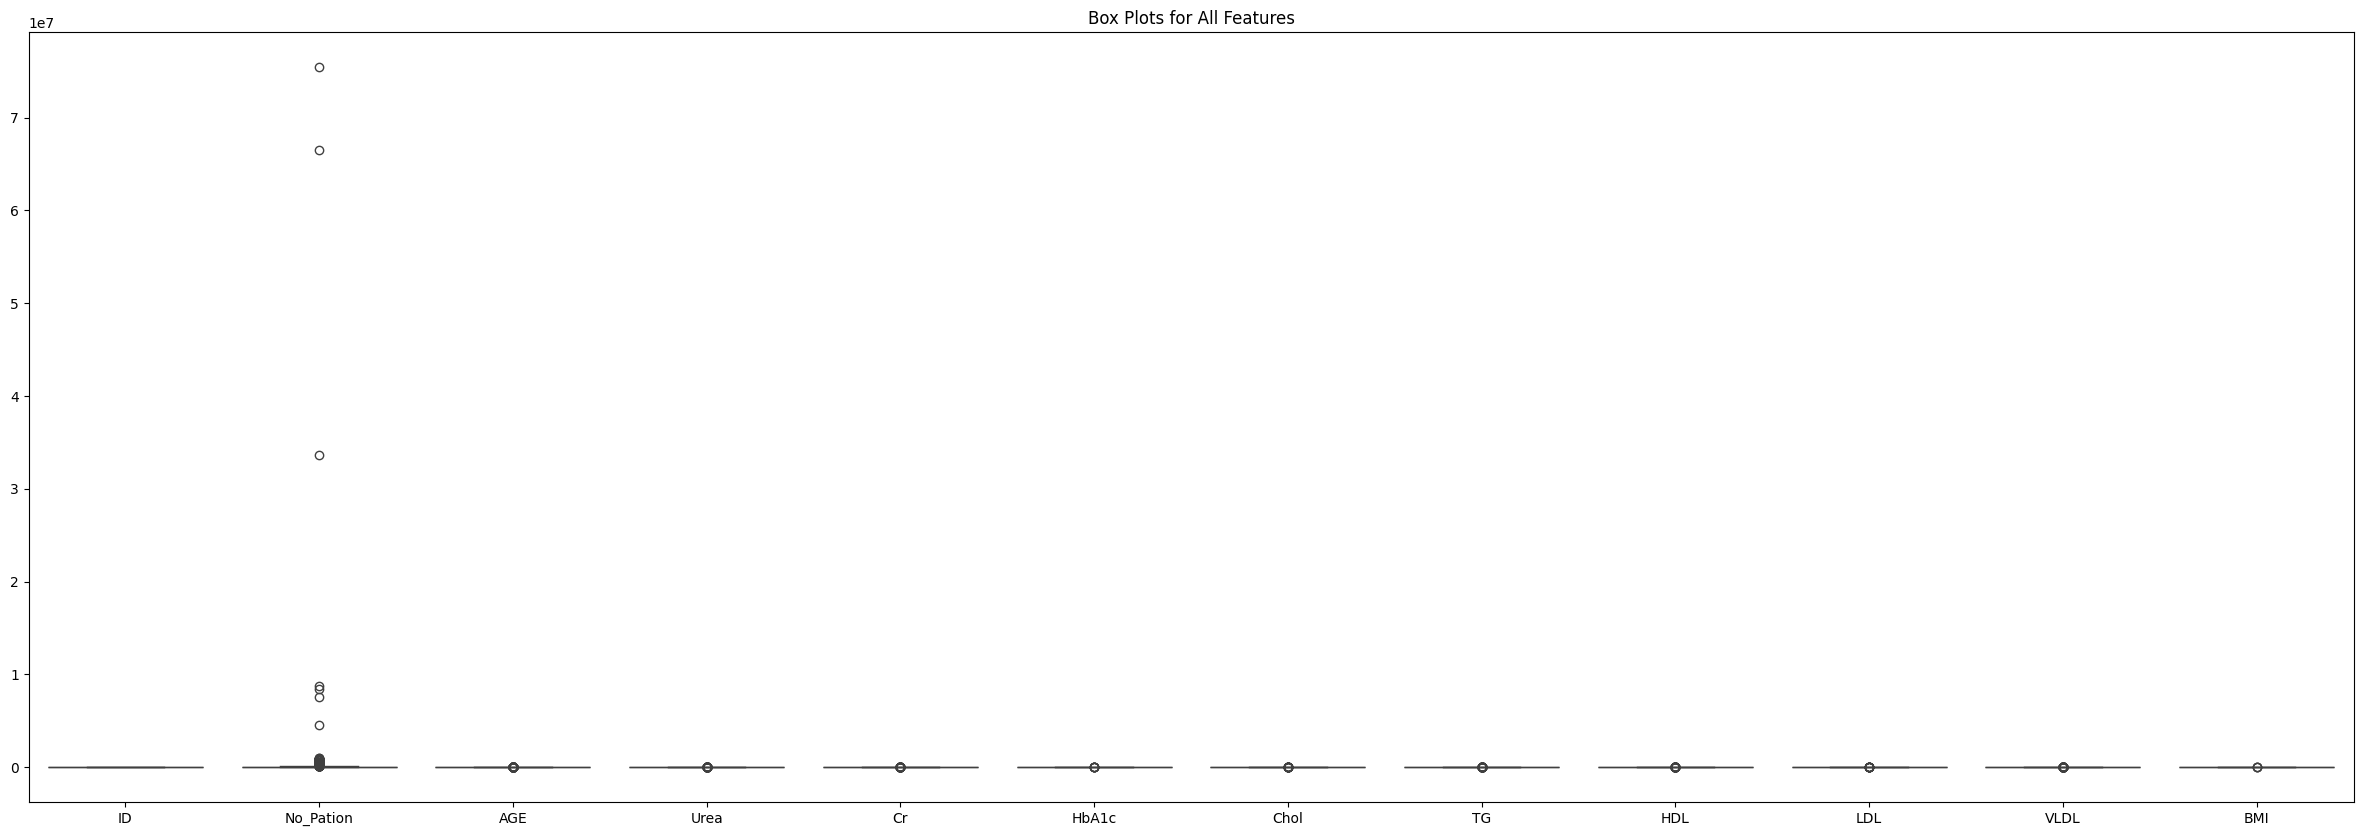

In [284]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=df)
plt.title('Box Plots for All Features')
plt.show()

In [285]:
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [286]:
df.rename(columns={'No_Pation':'No_Patient'}, inplace=True)

In [287]:
df['No_Patient'].unique()


array([   17975,    34221,    47975,    87656,    34223,    34224,
          34225,    34227,    34229,    34230,    34231,    34232,
          46815,    34234,    34235,    34236,    34237,    87654,
          34238,    34239,    34240,    12744,    34302,    34282,
          34242,    46675,    45566,    34309,    87664,    34245,
          34246,    34294, 75435657,    87655,    34290,    34248,
          34249,    34298,    34250,    34251,    34299,    34285,
          48759,    34293,     6402,    34254,    78554,    34255,
          34517,    34257,    34258,    34259,    34260,    34261,
          34262,    34295,    34264,    34271,    34273,    34274,
          34275,    34277,    34281,    21354,    85922,   568412,
           1168,   789566,    85764,    86745,   741741,    21747,
           4172,    42585,     8572,    78585,    57252,    45396,
          45367,    45388,    45399,    45389,    45374,    45410,
          45377,    45390,    45365,    45381,    45382,    45

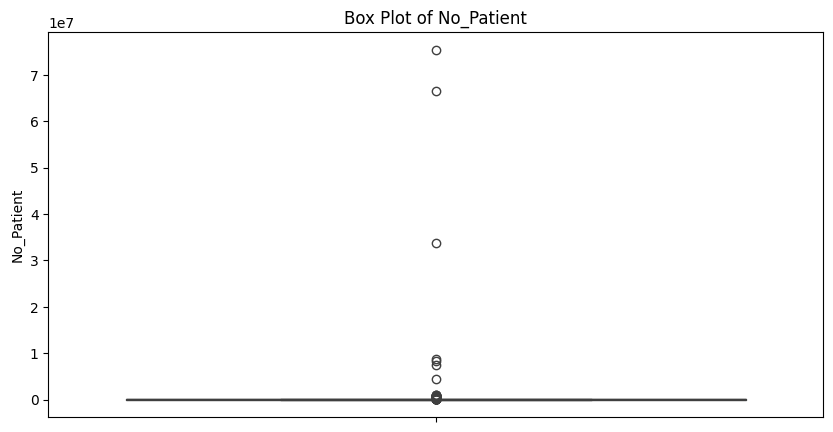

In [288]:

plt.figure(figsize=(10, 5))
sns.boxplot(df['No_Patient'])
plt.title('Box Plot of No_Patient')
plt.show()

In [289]:

df_edit = df.drop('No_Patient', axis=1) 

In [290]:
df_edit.drop('ID', axis=1, inplace=True)
df_edit.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


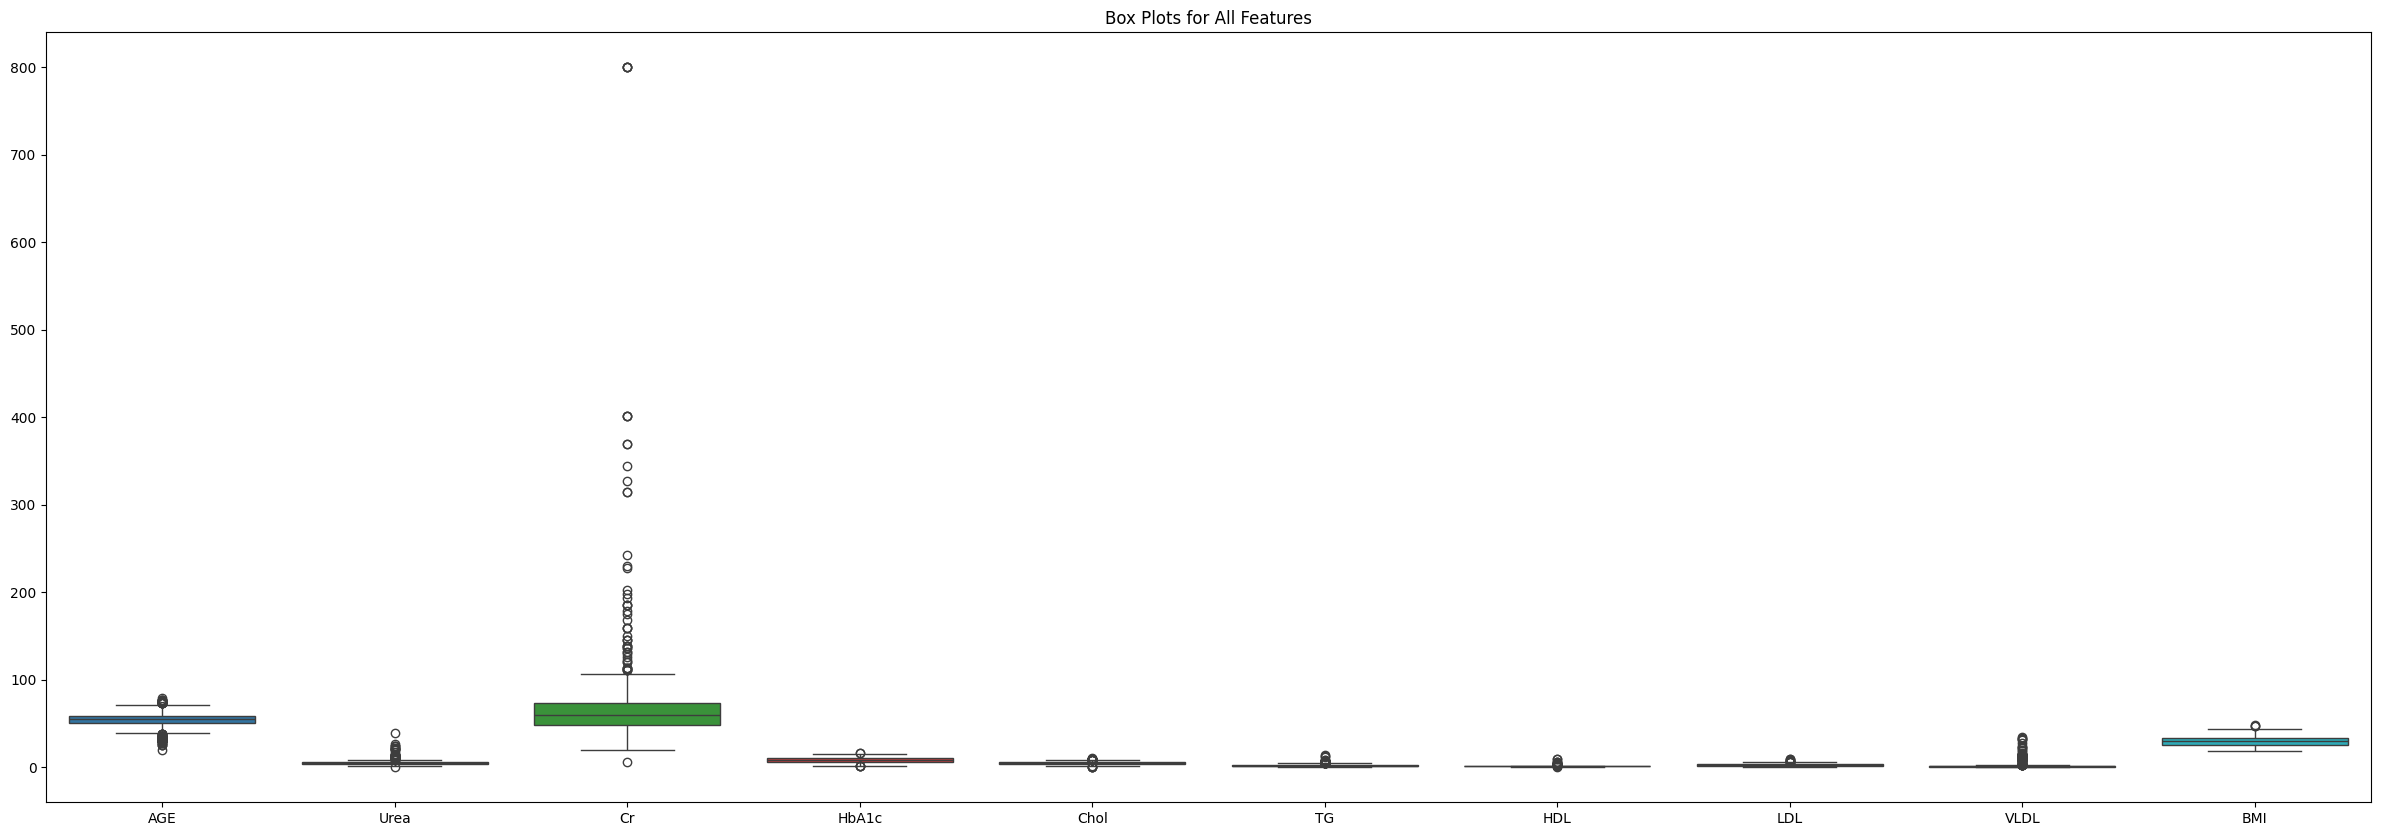

In [291]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=df_edit)
plt.title('Box Plots for All Features')
plt.show()

In [292]:
df_edit['AGE'].value_counts()

AGE
55    181
60     88
54     84
51     51
61     49
56     48
52     44
50     43
59     32
57     31
58     30
63     29
53     25
30     20
49     19
45     16
33     16
40     13
44     13
35     11
66     11
47     10
42     10
48     10
31      9
39      9
68      8
62      8
73      8
43      8
64      7
69      6
67      6
38      6
41      5
34      5
36      4
76      4
77      4
28      3
46      3
26      2
70      2
65      2
75      2
25      1
79      1
32      1
20      1
71      1
Name: count, dtype: int64

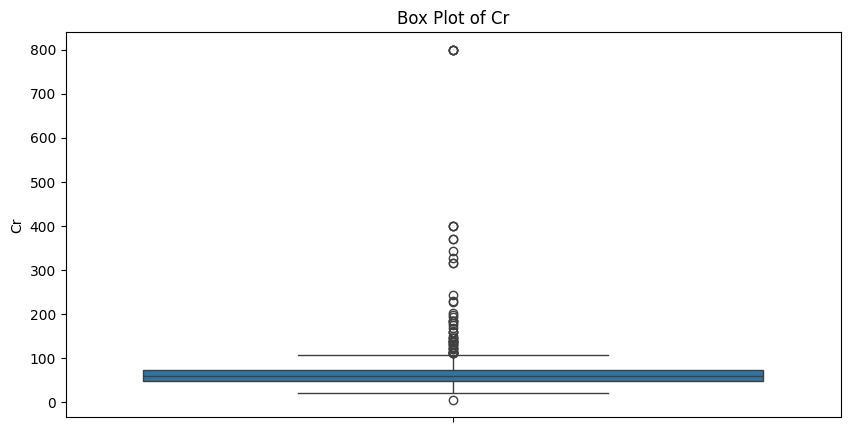

In [293]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_edit['Cr'])
plt.title('Box Plot of Cr')
plt.show()


In [294]:
df_edit = df_edit[df_edit['Cr'] <= 200]

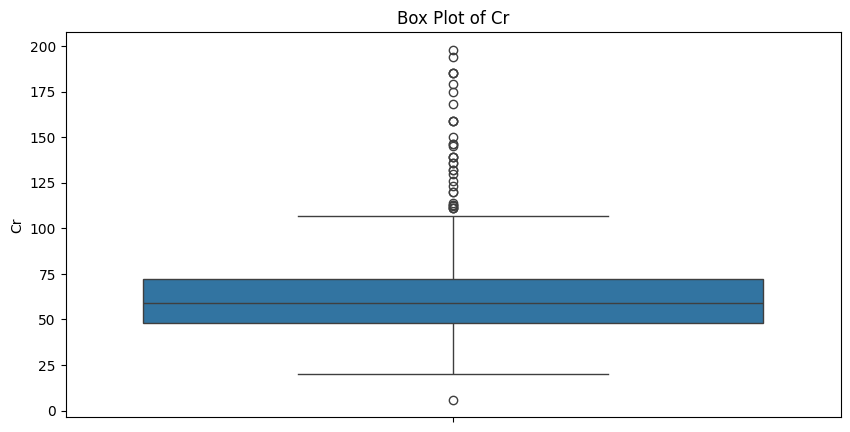

In [295]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_edit['Cr'])
plt.title('Box Plot of Cr')
plt.show()


## Here we normalize our data

In [296]:
numeric_features = df_edit.select_dtypes(include=[np.number])
numeric_features = numeric_features.columns
numeric_features

Index(['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL',
       'BMI'],
      dtype='object')

In [297]:
scaler = MinMaxScaler()
df_edit[numeric_features] = scaler.fit_transform(df_edit[numeric_features])
df_edit.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,0.508475,0.109375,0.208333,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,N
1,M,0.101695,0.104167,0.291667,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130,N
2,F,0.508475,0.109375,0.208333,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,N
3,F,0.508475,0.109375,0.208333,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,N
4,M,0.220339,0.171875,0.208333,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565,N


In [298]:
categorical_features = df_edit.select_dtypes(include=[object])
categorical_features = categorical_features.columns
categorical_features

Index(['Gender', 'CLASS'], dtype='object')

In [299]:
for col in categorical_features:
    print(f'{col} : {df_edit[col].value_counts()}')

Gender : Gender
M    552
F    430
f      1
Name: count, dtype: int64
CLASS : CLASS
Y    829
N    102
P     52
Name: count, dtype: int64


In [300]:
df_edit['Gender'] = df_edit['Gender'].replace('f', 'F')

# Verify the replacement
print(df_edit['Gender'].value_counts())

Gender
M    552
F    431
Name: count, dtype: int64


In [301]:
label_encoder = LabelEncoder()
for col in categorical_features:
    df_edit[col] = label_encoder.fit_transform(df_edit[col])

df_edit.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,0.508475,0.109375,0.208333,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,0
1,1,0.101695,0.104167,0.291667,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130,0
2,0,0.508475,0.109375,0.208333,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,0
3,0,0.508475,0.109375,0.208333,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,0
4,1,0.220339,0.171875,0.208333,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565,0


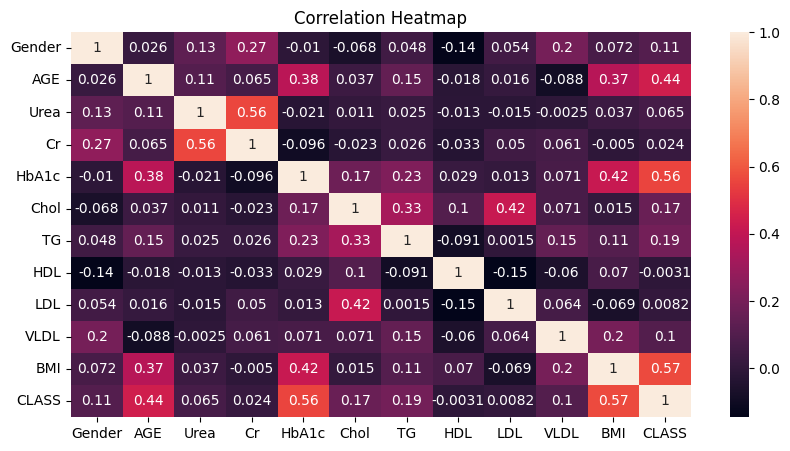

In [302]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_edit.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [303]:
corr_matrix = df_edit.corr()

abs_corr_matrix = corr_matrix.abs()

class_corr = abs_corr_matrix['CLASS']

lowest_corr_columns = class_corr.nsmallest(3).index

df_edit = df_edit.drop(columns=lowest_corr_columns)

df_edit.head()

,Gender,AGE,Urea,HbA1c,Chol,TG,VLDL,BMI,CLASS
0,0,0.508475,0.109375,0.264901,0.407767,0.044444,0.011461,0.173913,0
1,1,0.101695,0.104167,0.264901,0.359223,0.081481,0.014327,0.139130,0
2,0,0.508475,0.109375,0.264901,0.407767,0.044444,0.011461,0.173913,0
3,0,0.508475,0.109375,0.264901,0.407767,0.044444,0.011461,0.173913,0
4,1,0.220339,0.171875,0.264901,0.475728,0.051852,0.008596,0.069565,0


## Let's Start Predicting

In [304]:
X = df_edit.drop('CLASS', axis=1)
y = df_edit['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (786, 8)
X_test shape: (197, 8)
y_train shape: (786,)
y_test shape: (197,)


### Logistic Regression

### Importing Libraries
Import necessary libraries for data manipulation, visualization, and logistic regression implementation.


In [305]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000, random_state = 0)

### Training the Logistic Regression Model
Train the Logistic Regression model using the training dataset. The logistic regression algorithm is used for classification tasks and works by estimating probabilities using a logistic function.

In [306]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Making Predictions
Use the trained logistic regression model to make predictions on the testing dataset.

In [307]:
y_pred_LR = logmodel.predict(X_test)

In [308]:
from sklearn.metrics import accuracy_score
accuracy_log = accuracy_score(y_test, y_pred_LR)
accuracy_log

0.934010152284264

### Evaluating the Model
Evaluate the performance of the logistic regression model using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [309]:

from sklearn.metrics import classification_report
class_rep_log = classification_report(y_test, y_pred_LR)
print(class_rep_log)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.00      0.00      0.00         7
           2       0.95      0.98      0.97       170

    accuracy                           0.93       197
   macro avg       0.58      0.61      0.59       197
weighted avg       0.90      0.93      0.92       197



C:\Users\hanim\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hanim\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hanim\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [310]:
from sklearn.metrics import confusion_matrix
cm_LR = confusion_matrix(y_test,y_pred_LR)

### Visualizing the Results
Visualize the results of the models, such as the confusion matrix and cross validation, to better understand the model's performance.

In [311]:
def Plot_Confussion_Matrix(cm):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [312]:


def plot_accuracy_per_class(cm, class_names):
   
    
    accuracy_per_class = np.diagonal(cm) / cm.sum(axis=1)
    
    
    plt.figure(figsize=(8, 5))
    plt.bar(class_names, accuracy_per_class, color='green')
    plt.title('Accuracy per Class')
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)
    plt.show()

In [313]:
from sklearn.model_selection import cross_val_score

def plot_cross_validation_scores(model, X_train, y_train, cv=5):
    """
    Plot cross-validation scores for a given model.

    Parameters:
    model: A scikit-learn model (e.g., KNN, SVM, etc.).
    X_train: Training data features.
    y_train: Training data labels.
    cv: Number of cross-validation folds (default is 5).
    """
    # Get cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv)

    # Plotting the cross-validation scores
    plt.figure(figsize=(10, 7))
    plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', color='orange')
    plt.title(f'Cross-validation Scores for {model.__class__.__name__} Classifier')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.show()



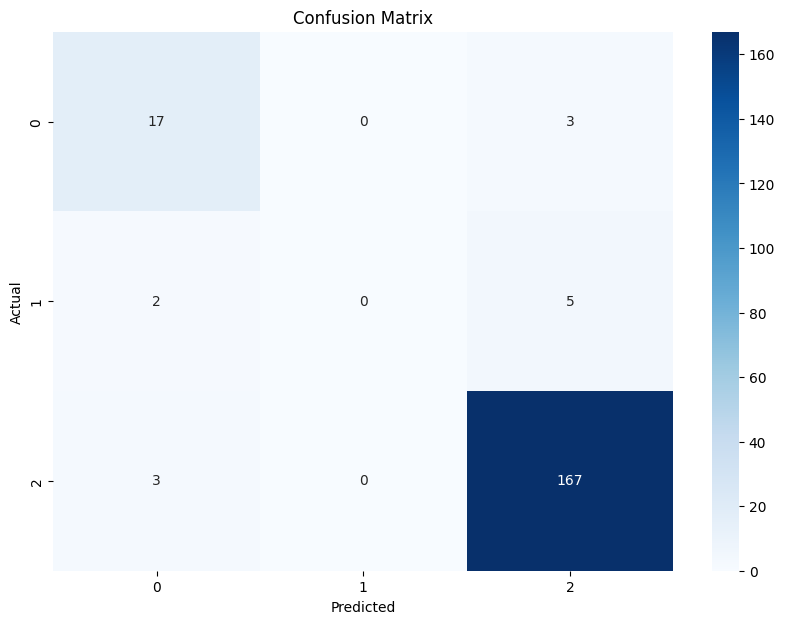

In [314]:
Plot_Confussion_Matrix(cm_LR)

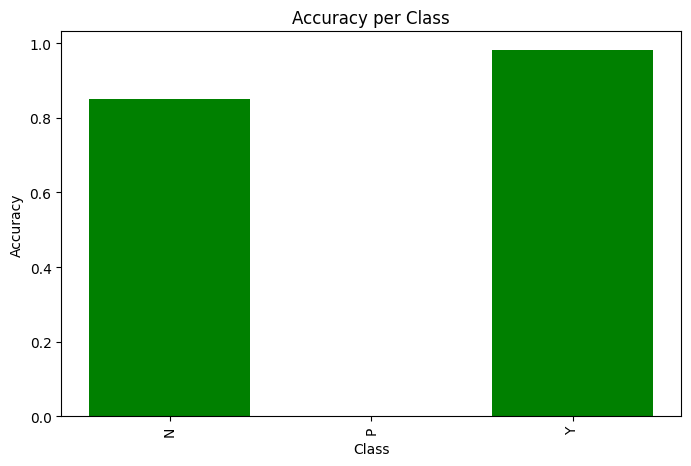

In [315]:
plot_accuracy_per_class(cm_LR, class_names)

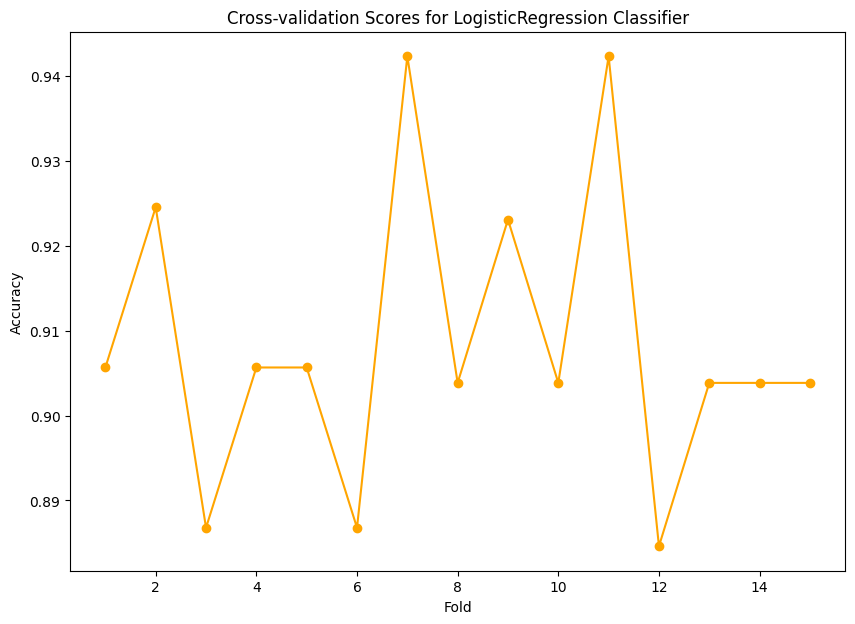

In [316]:
plot_cross_validation_scores(logmodel , X_train , y_train , cv=15)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100 , 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300 , 500 ]
}

grid_search = GridSearchCV(estimator=logmodel, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'C': 1000, 'max_iter': 100, 'solver': 'newton-cg'}
Best Score: 0.9185680883657181


Best Logistic Regression Accuracy: 0.9187817258883249
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.00      0.00      0.00         7
           2       0.96      0.96      0.96       170

    accuracy                           0.92       197
   macro avg       0.57      0.62      0.59       197
weighted avg       0.90      0.92      0.91       197



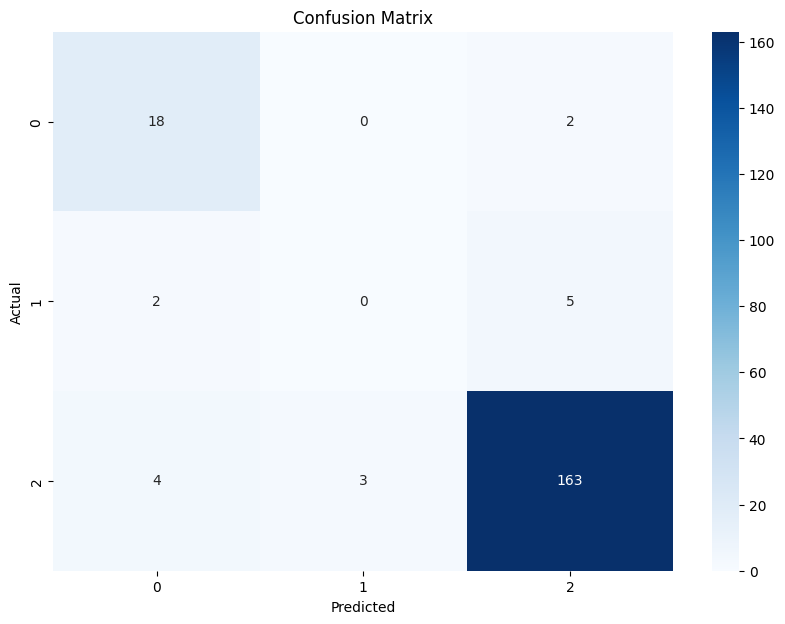

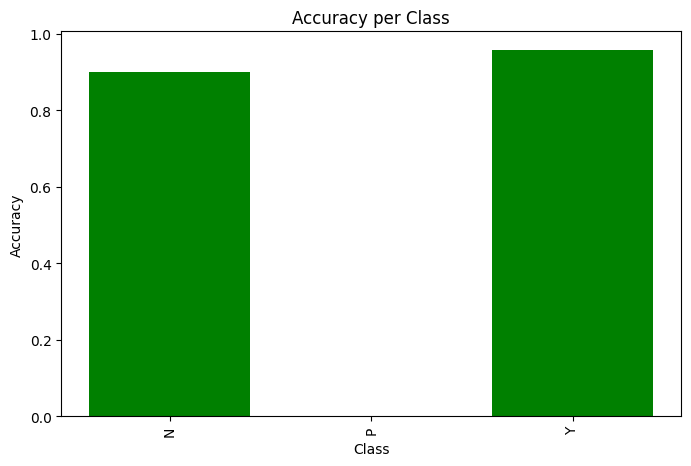

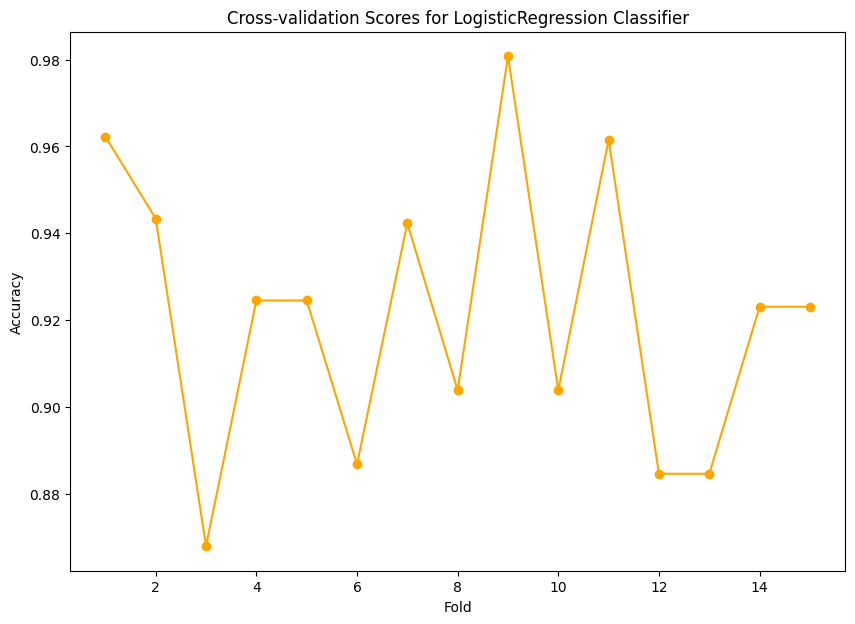

In [ ]:
best_logmodel = LogisticRegression(C=best_params['C'], solver=best_params['solver'], max_iter=best_params['max_iter'], random_state=0)

best_logmodel.fit(X_train, y_train)

y_pred_best_LR = best_logmodel.predict(X_test)

accuracy_best_log = accuracy_score(y_test, y_pred_best_LR)
print("Best Logistic Regression Accuracy:", accuracy_best_log)

class_rep_best_log = classification_report(y_test, y_pred_best_LR)
print(class_rep_best_log)

cm_best_LR = confusion_matrix(y_test, y_pred_best_LR)
Plot_Confussion_Matrix(cm_best_LR)
plot_accuracy_per_class(cm_best_LR, class_names)
plot_cross_validation_scores(best_logmodel, X_train, y_train, cv=15)

## KNN 

### Prediction Phase:
- When a new data point needs to be classified, the algorithm calculates the distance between this new point and all the points in the training data.
- It then selects the 'k' closest points (neighbors) to the new data point.
  - For **classification**, the algorithm assigns the class that is most common among these 'k' neighbors.

## Expected Outputs in the Notebook


### 1. Data Loading and Preprocessing:
- Loading the dataset (e.g., diabetes dataset).
- Splitting the dataset into training and testing sets.
- Normalizing or scaling the features if necessary.

### 2. Model Training:
- Initializing the KNN classifier with a specific value of 'k'.
- Fitting the classifier to the training data.

### 3. Model Evaluation:
- Predicting the labels for the test set.
- Calculating performance metrics such as accuracy, precision, recall, and F1-score.
- Displaying a confusion matrix to visualize the performance.

In [317]:
from sklearn.neighbors import KNeighborsClassifier
knnmod = KNeighborsClassifier(n_neighbors = 5)

In [318]:
knnmod.fit(X_train, y_train)

KNeighborsClassifier()

In [319]:
y_pred_KNN=knnmod.predict(X_test)

In [320]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred_KNN)
accuracy_knn

0.9593908629441624

In [321]:
from sklearn.metrics import classification_report
class_rep_knn = classification_report(y_test, y_pred_KNN)
print(class_rep_knn)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.71      0.71      0.71         7
           2       0.98      0.98      0.98       170

    accuracy                           0.96       197
   macro avg       0.85      0.86      0.86       197
weighted avg       0.96      0.96      0.96       197



In [322]:
cm_KNN=confusion_matrix(y_test,y_pred_KNN)

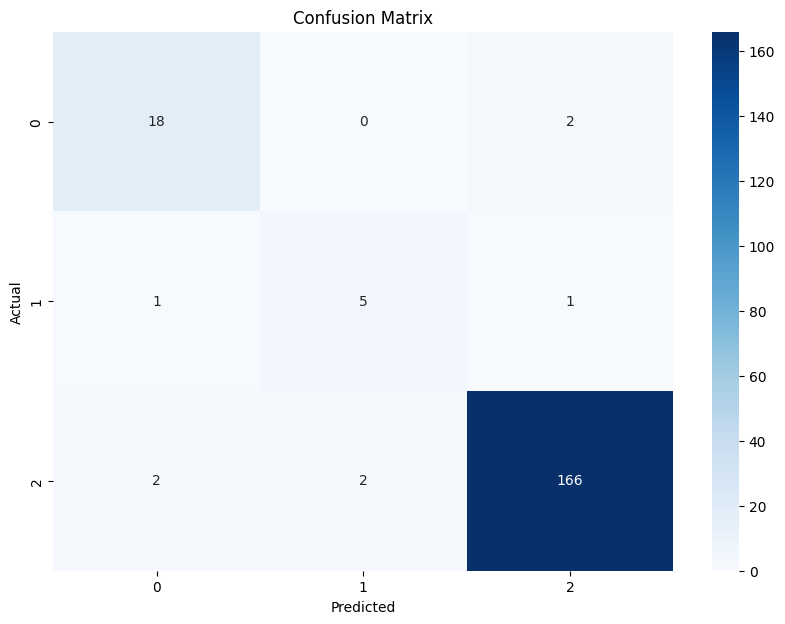

In [323]:
Plot_Confussion_Matrix(cm_KNN)

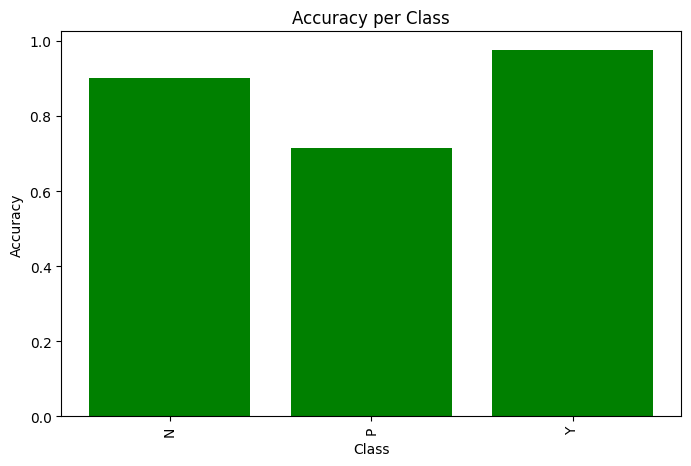

In [324]:
plot_accuracy_per_class(cm_KNN , class_names)

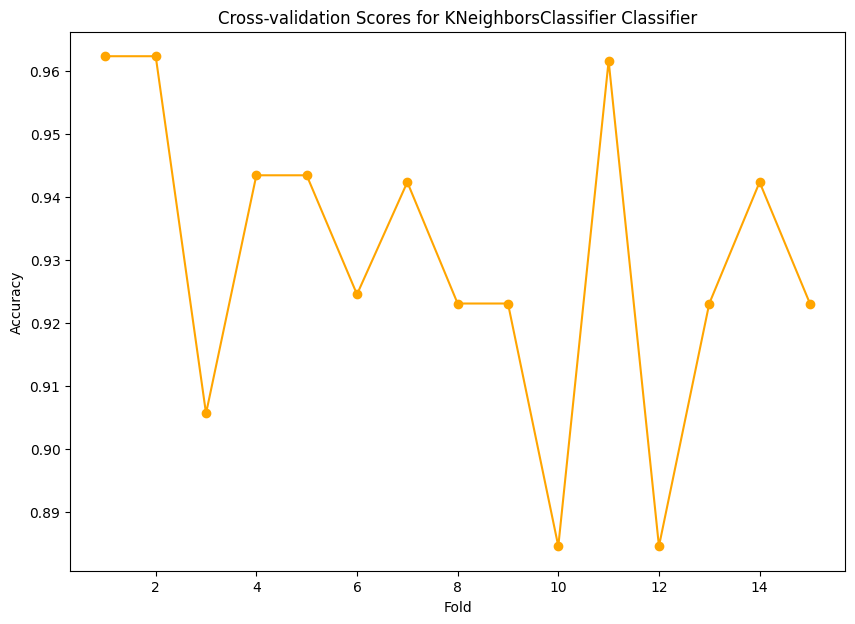

In [325]:
plot_cross_validation_scores(knnmod , X_train , y_train , cv=15)

## Decision Trees

### What are Decision Trees?
Decision Trees are a type of supervised learning algorithm used for both classification and regression tasks. They work by splitting the data into subsets based on the value of input features. This process is repeated recursively, creating a tree-like model of decisions.

### How Decision Trees Work
1. **Root Node**: The topmost node in a decision tree that represents the entire dataset.
2. **Splitting**: The process of dividing a node into two or more sub-nodes based on certain conditions.
3. **Decision Node**: A node that has sub-nodes (i.e., it is not a terminal node).
4. **Leaf/Terminal Node**: The end node that does not split further and represents a class label (in classification) or a value (in regression).
5. **Pruning**: The process of removing sub-nodes of a decision node to reduce the complexity of the model and prevent overfitting.

### Advantages of Decision Trees
- Easy to understand and interpret.
- Can handle both numerical and categorical data.
- Requires little data preprocessing.
- Can model complex decision boundaries.

### Disadvantages of Decision Trees
- Prone to overfitting, especially with noisy data.
- Can be biased towards features with more levels.
- Sensitive to small changes in the data.

In [326]:
from sklearn.tree import DecisionTreeClassifier
decisionmod = DecisionTreeClassifier(random_state=1)

In [327]:
decisionmod.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [328]:
y_pred_DT = decisionmod.predict(X_test)

In [329]:
accuracy_decision = accuracy_score(y_test, y_pred_DT)
accuracy_decision

0.9898477157360406

In [330]:
class_rep_decision = classification_report(y_test, y_pred_DT)
print(class_rep_decision)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       1.00      1.00      1.00         7
           2       0.99      1.00      0.99       170

    accuracy                           0.99       197
   macro avg       1.00      0.97      0.98       197
weighted avg       0.99      0.99      0.99       197



In [331]:
cm_decision = confusion_matrix(y_test, y_pred_DT)

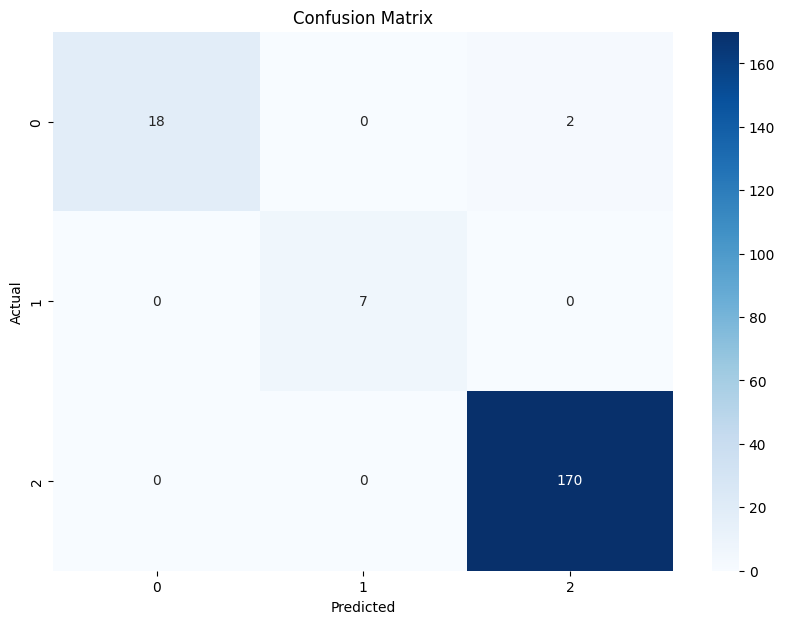

In [332]:
Plot_Confussion_Matrix(cm_decision)

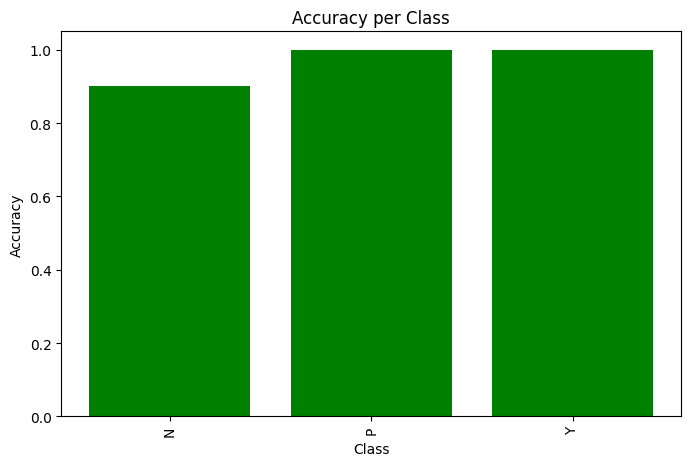

In [333]:
plot_accuracy_per_class(cm_decision , class_names)

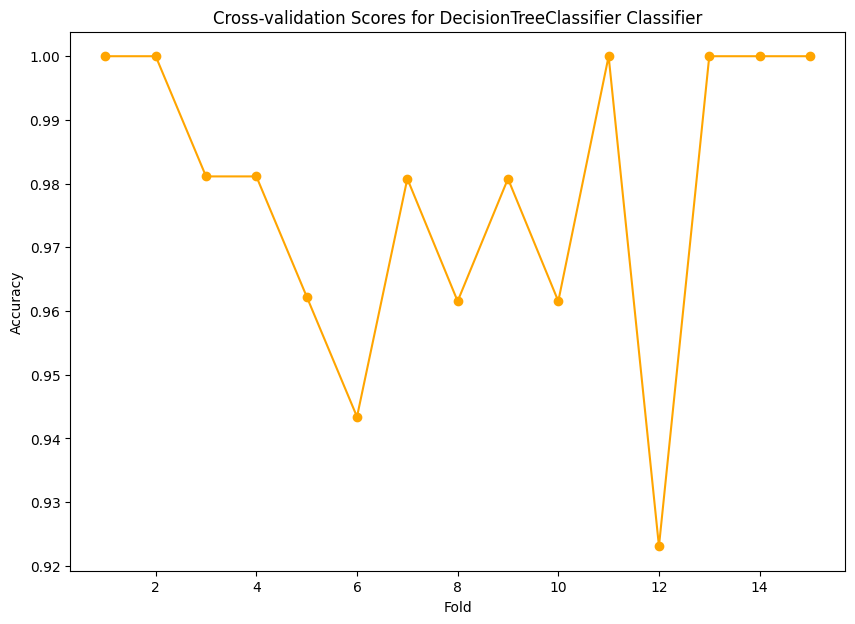

In [334]:
plot_cross_validation_scores(decisionmod , X_train , y_train , cv=15)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid_dt, n_jobs=-1, verbose=2)

grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters for Decision Tree:", best_params_dt)
print("Best Score for Decision Tree:", best_score_dt)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score for Decision Tree: 0.9808997823107314


Best Decision Tree Accuracy: 0.9949238578680203
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      1.00      1.00         7
           2       0.99      1.00      1.00       170

    accuracy                           0.99       197
   macro avg       1.00      0.98      0.99       197
weighted avg       0.99      0.99      0.99       197



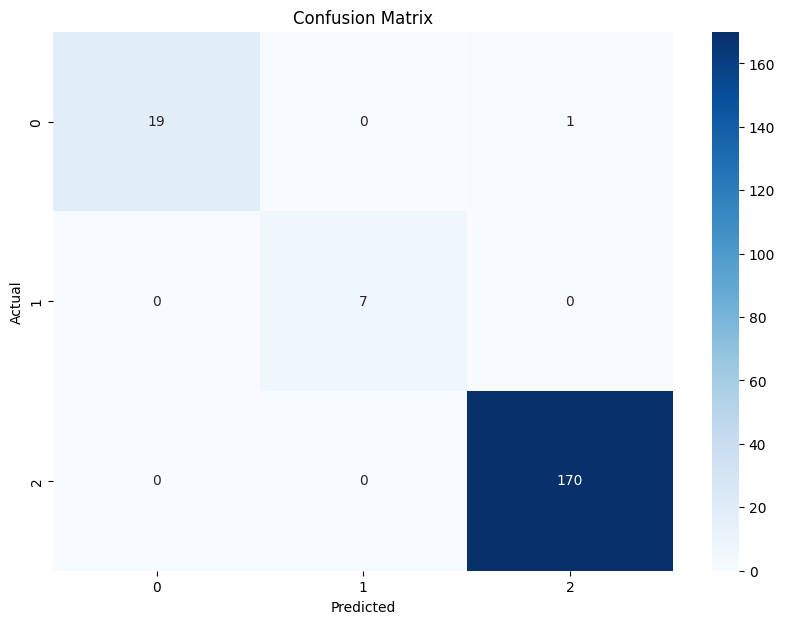

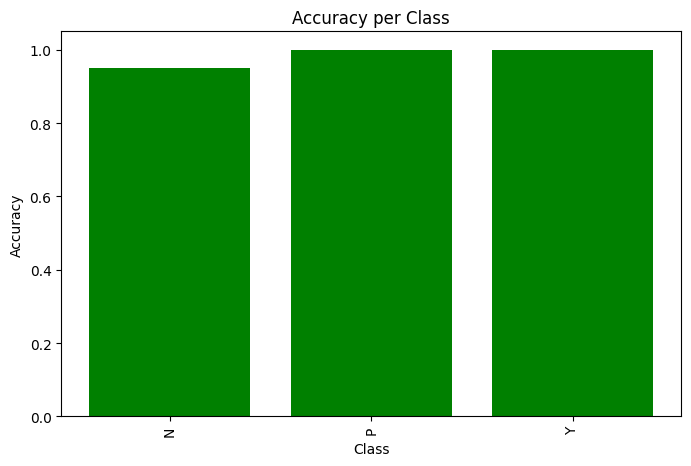

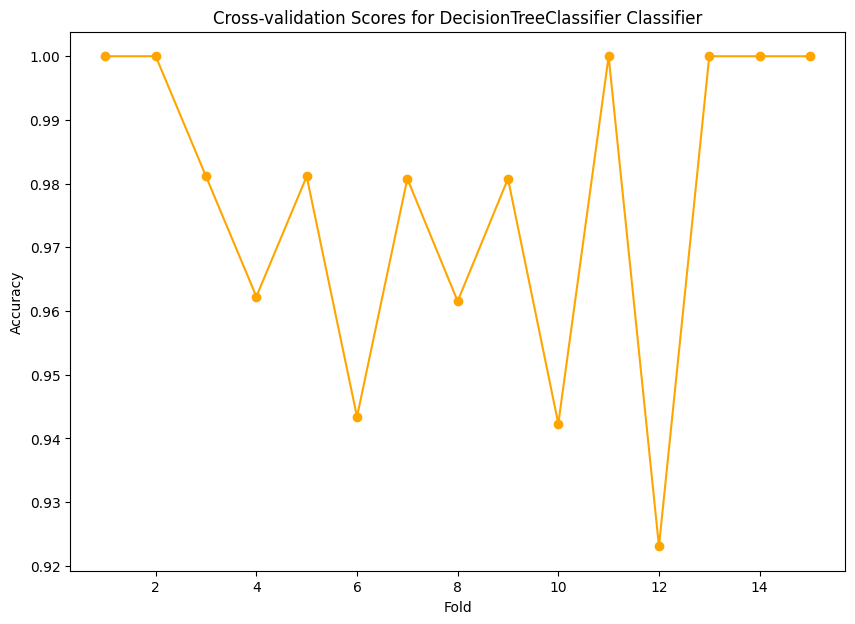

In [417]:
# Train the model with the best parameters
best_decisionmod = DecisionTreeClassifier(criterion=best_params_dt['criterion'], 
                                          max_depth=best_params_dt['max_depth'], 
                                          min_samples_split=best_params_dt['min_samples_split'], 
                                          min_samples_leaf=best_params_dt['min_samples_leaf'], 
                                          random_state=42)
best_decisionmod.fit(X_train, y_train)

# Make predictions
y_pred_best_DT = best_decisionmod.predict(X_test)

# Evaluate the model
accuracy_best_decision = accuracy_score(y_test, y_pred_best_DT)
print("Best Decision Tree Accuracy:", accuracy_best_decision)

class_rep_best_decision = classification_report(y_test, y_pred_best_DT)
print(class_rep_best_decision)

cm_best_DT = confusion_matrix(y_test, y_pred_best_DT)
Plot_Confussion_Matrix(cm_best_DT)
plot_accuracy_per_class(cm_best_DT, class_names)
plot_cross_validation_scores(best_decisionmod, X_train, y_train, cv=15)

# Random Forest Algorithm for Classification

Random Forest is an ensemble learning method used for classification, regression, and other tasks. It operates by constructing multiple decision trees during training and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees.

## Key Concepts:

### 1. **Ensemble Learning**:
- Combines multiple models to produce a better result than any single model.

### 2. **Decision Trees**:
- A tree-like model used to make decisions based on input features.

### 3. **Bootstrap Aggregation (Bagging)**:
- Randomly samples the training data with replacement to create multiple subsets. Each subset is used to train a different decision tree.

### 4. **Feature Randomness**:
- At each split in the decision tree, a random subset of features is considered, which helps in creating diverse trees.

## How Random Forest Works:

### **Training Phase**:
- Multiple decision trees are trained on different subsets of the training data.
- Each tree is trained on a bootstrap sample (random sampling with replacement).
- At each node in the tree, a random subset of features is considered for splitting.

### **Prediction Phase**:
- For **classification**, each tree in the forest votes for a class, and the class with the most votes is chosen as the final prediction.
- For **regression**, the predictions of all trees are averaged to produce the final prediction.

## Outputs of Random Forest for Classification:

### 1. **Predictions**:
- The output is the predicted **class label** based on the majority vote from all trees in the forest.

### 2. **Feature Importance**:
- Random Forest provides a measure of the **importance of each feature** in making predictions. This is often calculated based on how much each feature decreases the impurity (e.g., Gini impurity) across all trees in the forest.

### 3. **Out-of-Bag (OOB) Error**:
- Since each tree is trained on a bootstrap sample, some data points are left out (out-of-bag samples). The OOB error is an estimate of the model's performance on unseen data, calculated using these out-of-bag samples.


In [335]:
from sklearn.ensemble import RandomForestClassifier
randommod = RandomForestClassifier(random_state=42, n_estimators=100)



In [336]:
randommod.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [337]:
y_pred_RF = randommod.predict(X_test)


In [338]:

from sklearn.metrics import accuracy_score
accuracy_random = accuracy_score(y_test, y_pred_RF)
accuracy_random

0.9847715736040609

In [339]:
from sklearn.metrics import classification_report
class_rep_random = classification_report(y_test, y_pred_RF)
print(class_rep_random)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       1.00      1.00      1.00         7
           2       0.98      1.00      0.99       170

    accuracy                           0.98       197
   macro avg       0.99      0.95      0.97       197
weighted avg       0.99      0.98      0.98       197



In [340]:
cm_RF=confusion_matrix(y_test,y_pred_RF)

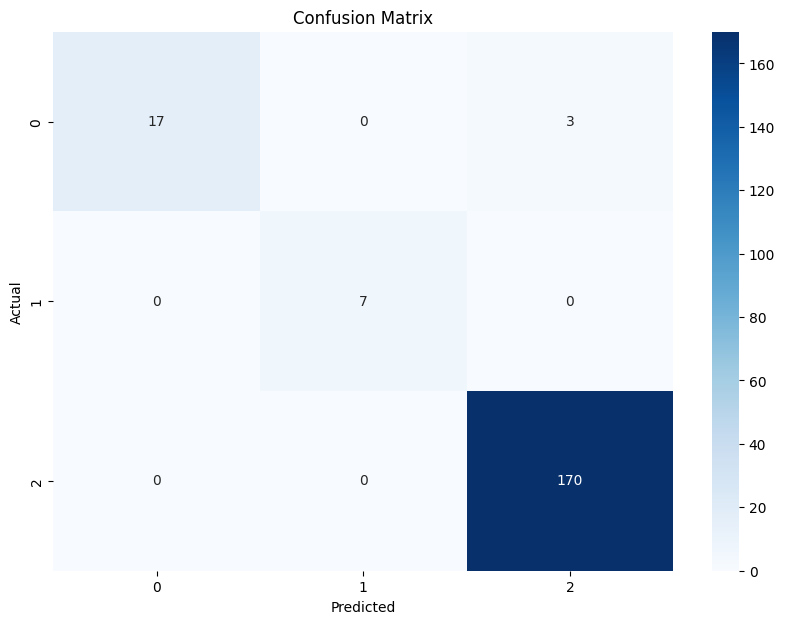

In [341]:
Plot_Confussion_Matrix(cm_RF)

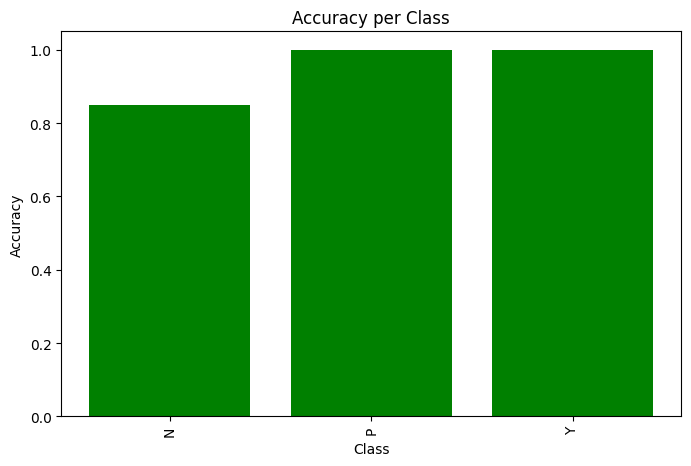

In [342]:
plot_accuracy_per_class(cm_RF , class_names)

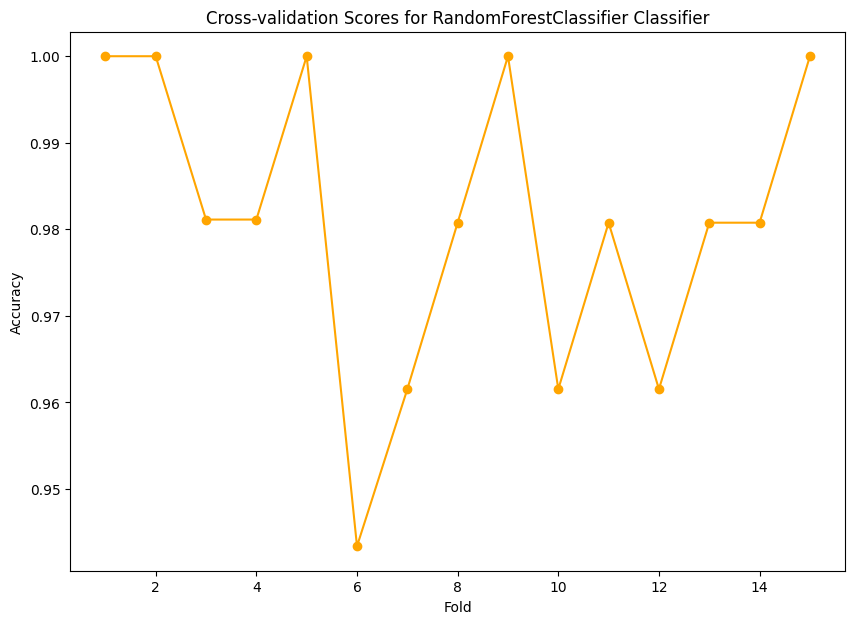

In [343]:
plot_cross_validation_scores(randommod , X_train , y_train , cv=15)

### XGboost Classifier 


XGBoost is a powerful and efficient implementation of the gradient boosting algorithm. It is widely used for supervised learning tasks, such as classification and regression. XGBoost is known for its speed and performance, making it a popular choice in machine learning competitions and real-world applications.

## Key Features of XGBoost:

### 1. **Regularization**:
- XGBoost includes **L1 (Lasso)** and **L2 (Ridge)** regularization to prevent overfitting.

### 2. **Parallel Processing**:
- It supports **parallel processing**, which speeds up the training process.

### 3. **Tree Pruning**:
- XGBoost uses a technique called **"max depth"** to prune trees, which helps in controlling overfitting.

### 4. **Handling Missing Values**:
- XGBoost has a built-in mechanism to **handle missing values** during the training process.

### 5. **Cross-Validation**:
- XGBoost supports **cross-validation** at each iteration of the boosting process.


In [344]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [345]:

y_pred_xgb = xgb_model.predict(X_test)


In [346]:

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)


XGBoost Classifier Accuracy: 1.0


In [347]:

class_rep_xgb = classification_report(y_test, y_pred_xgb)
print(class_rep_xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00       170

    accuracy                           1.00       197
   macro avg       1.00      1.00      1.00       197
weighted avg       1.00      1.00      1.00       197



In [348]:
cm_xgb=confusion_matrix(y_test,y_pred_xgb)

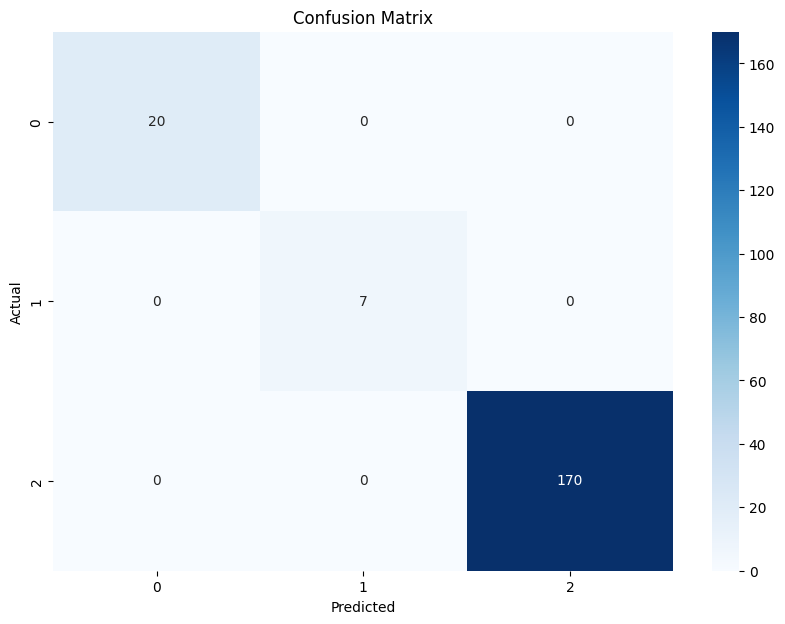

In [349]:
Plot_Confussion_Matrix(cm_xgb)

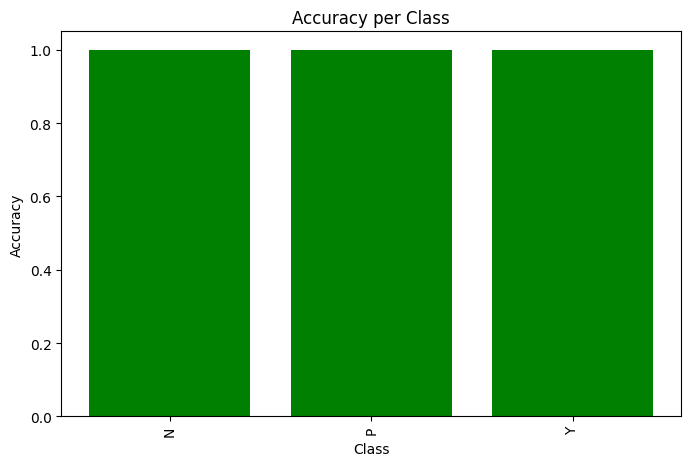

In [350]:
plot_accuracy_per_class(cm_xgb , class_names)

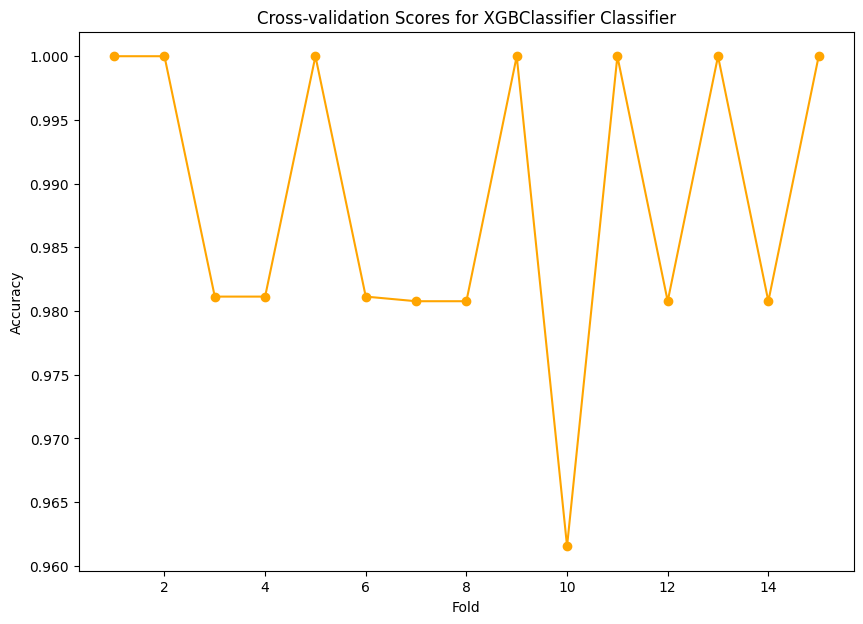

In [351]:
plot_cross_validation_scores(xgb_model , X_train , y_train , cv=15)

### SVM 


### Importing Libraries
Import necessary libraries for data manipulation, visualization, and SVM implementation
    

In [352]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)


  ### Training the SVM Model
    Train the Support Vector Machine (SVM) model using the training dataset. The SVM algorithm is used for classification tasks and works by finding the hyperplane that best separates the classes in the feature space.

In [353]:

svm_model.fit(X_train, y_train)


SVC(random_state=42)

### Making Predictions
    Use the trained SVM model to make predictions on the testing dataset.

In [354]:
y_pred_svm = svm_model.predict(X_test)


In [355]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.934010152284264


In [356]:
class_rep_svm = classification_report(y_test, y_pred_svm)
print(class_rep_svm)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.00      0.00      0.00         7
           2       0.96      0.98      0.97       170

    accuracy                           0.93       197
   macro avg       0.57      0.63      0.60       197
weighted avg       0.90      0.93      0.92       197



C:\Users\hanim\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hanim\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hanim\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [357]:
cm_svm=confusion_matrix(y_test,y_pred_svm)

### Evaluating the Model
    Evaluate the performance of the SVM model using appropriate metrics such as accuracy, precision, recall, and F1-score.

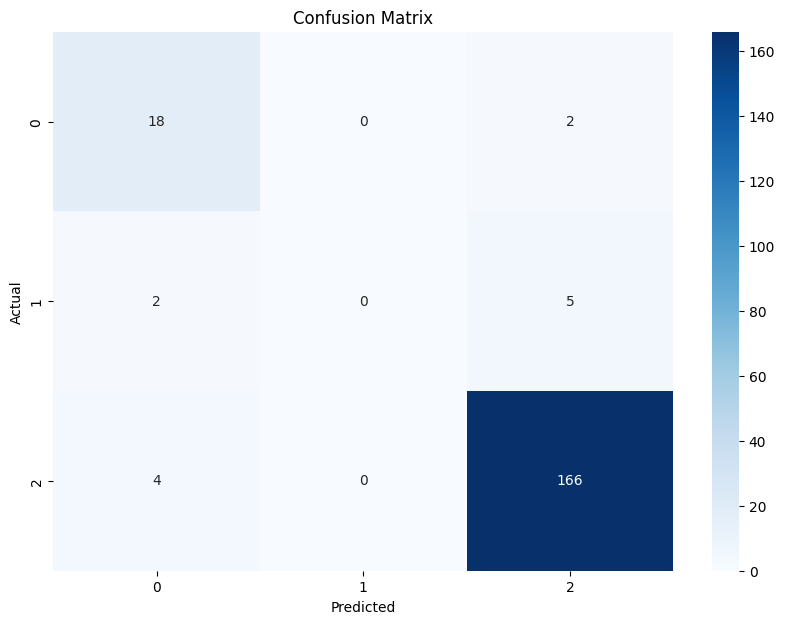

In [358]:
Plot_Confussion_Matrix(cm_svm)

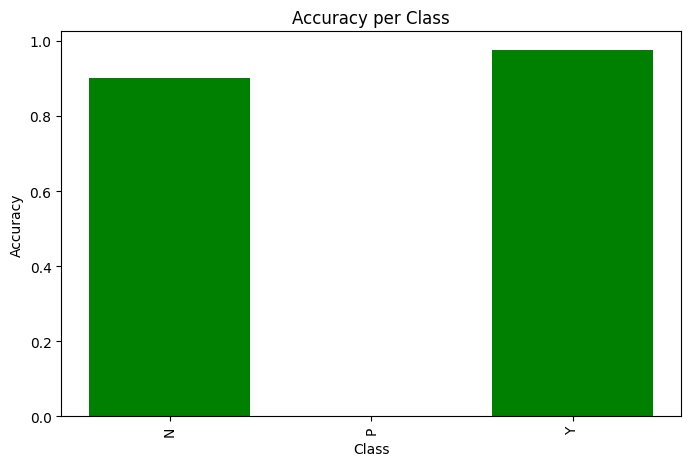

In [359]:
plot_accuracy_per_class(cm_svm , class_names)

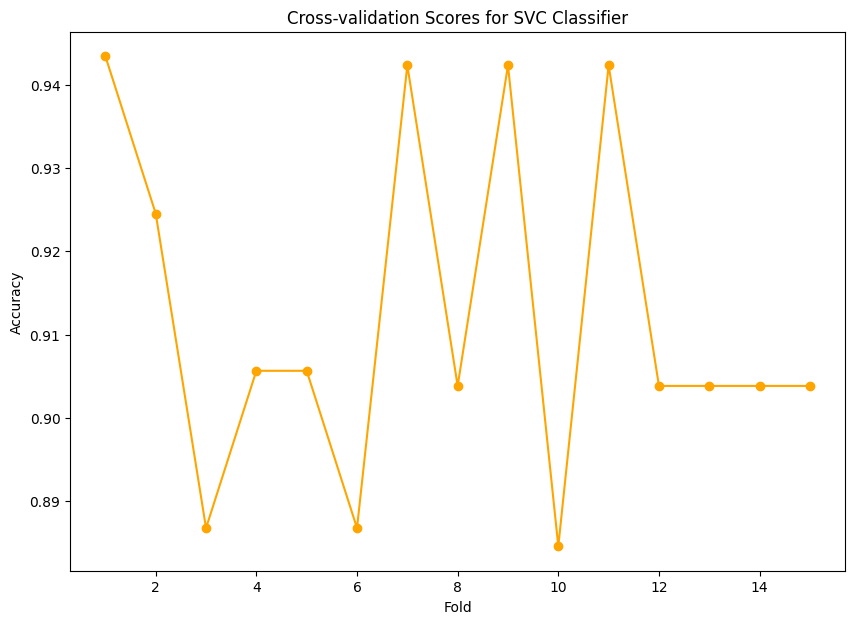

In [360]:
plot_cross_validation_scores(svm_model , X_train , y_train , cv=15)

### Gaussian Naive Bayes


### Importing Libraries
Import necessary libraries for data manipulation, visualization, and Naive Bayes implementation
    

In [361]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()



### Training Process of Gaussian Naive Bayes

The Gaussian Naive Bayes (GNB) classifier is a probabilistic classifier based on Bayes' theorem, assuming that the features follow a normal (Gaussian) distribution. Here are the steps involved in training the GNB model:

**Importing the GaussianNB Classifier**:
    - We first import the `GaussianNB` class from the `sklearn.naive_bayes` module.

**Initializing the Model**:
    - We create an instance of the `GaussianNB` classifier.

**Training the Model**:
    - We fit the model to the training data (`X_train` and `y_train`) using the `fit` method.








In [362]:
nb_model.fit(X_train, y_train)


GaussianNB()


**Making Predictions**:
    - After training, we use the trained model to make predictions on the test data (`X_test`) using the `predict` method.



In [363]:

y_pred_nb = nb_model.predict(X_test)


**Evaluating the Model**:
    - We evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score. We also visualize the confusion matrix to understand the model's performance better.

In [364]:

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)


Naive Bayes Accuracy: 0.9441624365482234


In [365]:

class_rep_nb = classification_report(y_test, y_pred_nb)
print(class_rep_nb)

              precision    recall  f1-score   support

           0       0.73      0.95      0.83        20
           1       0.67      0.86      0.75         7
           2       0.99      0.95      0.97       170

    accuracy                           0.94       197
   macro avg       0.80      0.92      0.85       197
weighted avg       0.96      0.94      0.95       197



In [366]:
cm_nb = confusion_matrix(y_test,y_pred_nb)

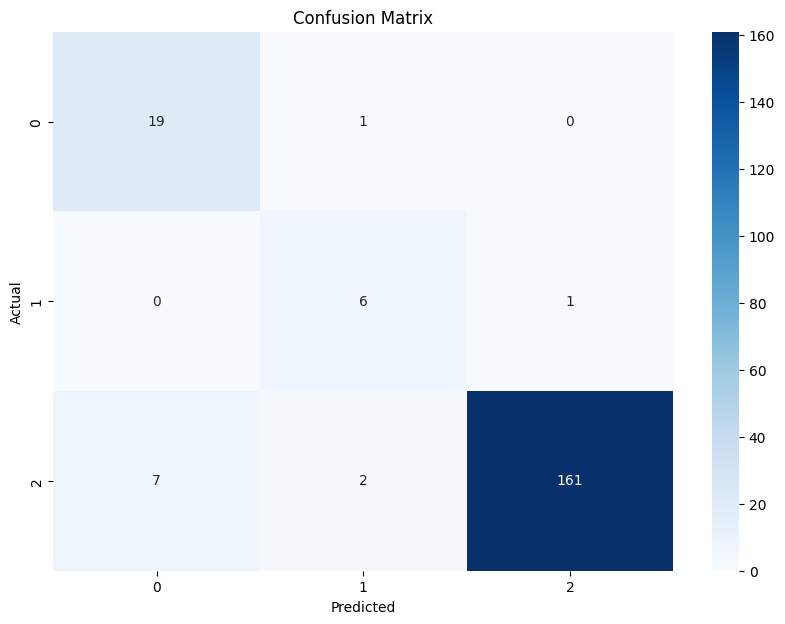

In [367]:
Plot_Confussion_Matrix(cm_nb)

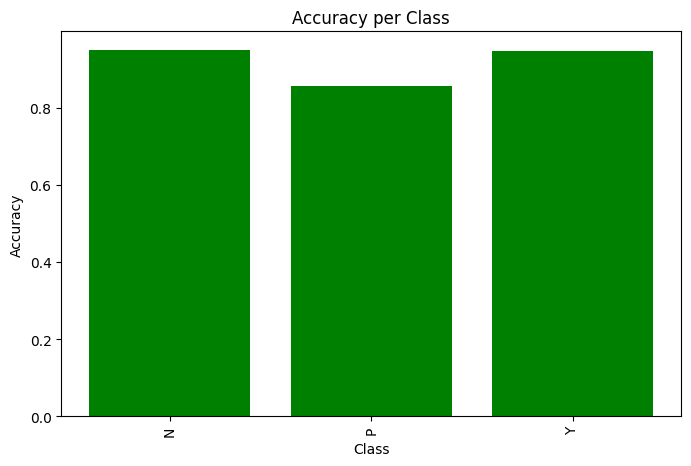

In [368]:
plot_accuracy_per_class(cm_nb , class_names)

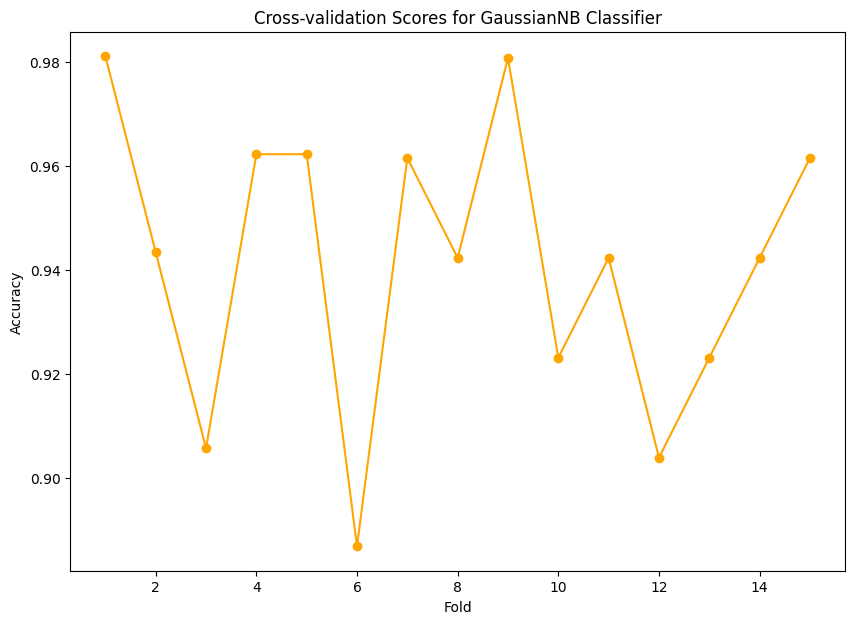

In [369]:
plot_cross_validation_scores(nb_model , X_train , y_train , cv =15)

### Check for the best model

C:\Users\hanim\AppData\Local\Temp\ipykernel_44760\897025566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='PuBuGn')


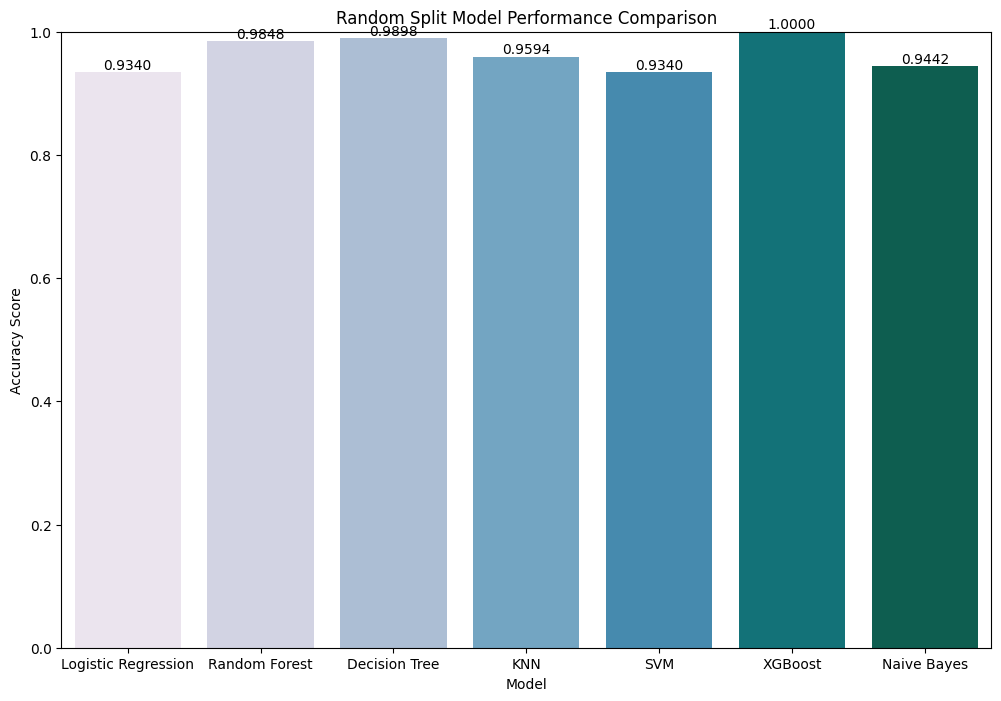

In [370]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN', 'SVM', 'XGBoost','Naive Bayes']
scores = [accuracy_log, accuracy_random, accuracy_decision, accuracy_knn, accuracy_svm, accuracy_xgb , accuracy_nb]

plt.figure(figsize=(12, 8))
sns.barplot(x=models, y=scores, palette='PuBuGn')
plt.title('Random Split Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)

for i, score in enumerate(scores):
    plt.text(i, score + 0.0001, f'{score:.4f}', ha='center', va='bottom', color='black')

plt.show()

### K-Fold Splitting 


K-Fold Cross-Validation is a technique used to evaluate the performance of a machine learning model. It helps assess the model's robustness and generalizability by splitting the data into multiple subsets (or "folds") and training/testing the model on each of them. This technique is especially useful when you have a limited amount of data and want to avoid overfitting.

#### Steps in the K-Fold Cross-Validation Process:

1. **Data Splitting (K-Folds)**:
   - The dataset is randomly shuffled and split into `K` equal-sized subsets or "folds". 
   - For example, if `K=6`, the dataset is divided into 6 folds.
   - Each fold is used as the validation set once, while the remaining `K-1` folds are used as the training set.

2. **Training and Evaluation**:
   - For each fold:
     1. **Training the Model**: The model is trained on the training data, which consists of `K-1` folds.
     2. **Testing the Model**: The trained model is evaluated on the test data, which consists of the remaining fold (the one that wasn’t included in the training set).
     3. **Accuracy Calculation**: The accuracy of the model for the current fold is calculated (in your code, it's done using `accuracy_score`).

3. **Average Accuracy**:
   - After going through all the folds, the model's performance is summarized by computing the **average accuracy** across all folds. This gives a better understanding of how the model performs across different subsets of the data.

4. **Final Model Evaluation**:
   - Once all the folds are processed and averaged, you get a more reliable estimate of the model's generalization performance.
   - This helps in understanding how well the model will perform on unseen data.


In [371]:
from sklearn.model_selection import KFold

X = df_edit.drop('CLASS', axis=1)
y = df_edit['CLASS']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)


X_train shape: (786, 8)
X_test shape: (197, 8)
y_train shape: (786,)
y_test shape: (197,)
X_train shape: (786, 8)
X_test shape: (197, 8)
y_train shape: (786,)
y_test shape: (197,)
X_train shape: (786, 8)
X_test shape: (197, 8)
y_train shape: (786,)
y_test shape: (197,)
X_train shape: (786, 8)
X_test shape: (197, 8)
y_train shape: (786,)
y_test shape: (197,)
X_train shape: (786, 8)
X_test shape: (197, 8)
y_train shape: (786,)
y_test shape: (197,)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_edit.drop('CLASS', axis=1)
y = df_edit['CLASS']

kf = KFold(n_splits=6, shuffle=True, random_state=42)

log_reg_kf_mod= LogisticRegression()

accuracies = []

for train_index, test_index in kf.split(X):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    log_reg_kf_mod.fit(X_train_kfold, y_train_kfold)
    
    y_pred_kfold = log_reg_kf_mod.predict(X_test_kfold)
    
    accuracy = accuracy_score(y_test_kfold, y_pred_kfold)
    accuracies.append(accuracy)
    
    
    
LR_average_accuracy = sum(accuracies) / len(accuracies)
print("Average accuracy over all folds:", LR_average_accuracy)

Average accuracy over all folds: 0.9135243653050028


In [ ]:


KNN_kf_mod = KNeighborsClassifier()

accuracies = []

for train_index, test_index in kf.split(X):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    KNN_kf_mod.fit(X_train_kfold, y_train_kfold)
    
    y_pred_kfold = KNN_kf_mod.predict(X_test_kfold)
    
    accuracy = accuracy_score(y_test_kfold, y_pred_kfold)
    accuracies.append(accuracy)
    
    
    
KNN_average_accuracy = sum(accuracies) / len(accuracies)
print("Average accuracy over all folds:", KNN_average_accuracy)

Average accuracy over all folds: 0.9338745074567311


In [ ]:


Decision_Tree_kf_model = DecisionTreeClassifier()

accuracies = []

for train_index, test_index in kf.split(X):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    Decision_Tree_kf_model.fit(X_train_kfold, y_train_kfold)
    
    y_pred_kfold = Decision_Tree_kf_model.predict(X_test_kfold)
    
    accuracy = accuracy_score(y_test_kfold, y_pred_kfold)
    accuracies.append(accuracy)
    
    
    
DT_average_accuracy = sum(accuracies) / len(accuracies)
print("Average accuracy over all folds:", DT_average_accuracy)

Average accuracy over all folds: 0.9817010823482467


In [ ]:


RF_kf_mod = RandomForestClassifier()

accuracies = []

for train_index, test_index in kf.split(X):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    RF_kf_mod.fit(X_train_kfold, y_train_kfold)
    
    y_pred_kfold = RF_kf_mod.predict(X_test_kfold)
    
    accuracy = accuracy_score(y_test_kfold, y_pred_kfold)
    accuracies.append(accuracy)
    
    
    
RF_average_accuracy = sum(accuracies) / len(accuracies)
print("Average accuracy over all folds:", RF_average_accuracy)

Average accuracy over all folds: 0.9837336026734501


In [ ]:


Nb_kf_model = GaussianNB()

accuracies = []

for train_index, test_index in kf.split(X):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    Nb_kf_model.fit(X_train_kfold, y_train_kfold)
    
    y_pred_kfold = Nb_kf_model.predict(X_test_kfold)
    
    accuracy = accuracy_score(y_test_kfold, y_pred_kfold)
    accuracies.append(accuracy)
    
    
    
nb_average_accuracy = sum(accuracies) / len(accuracies)
print("Average accuracy over all folds:", nb_average_accuracy)

Average accuracy over all folds: 0.9369232879445359


In [ ]:


Xgb_kf_model = XGBClassifier()

accuracies = []

for train_index, test_index in kf.split(X):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    Xgb_kf_model.fit(X_train_kfold, y_train_kfold)
    
    y_pred_kfold = Xgb_kf_model.predict(X_test_kfold)
    
    accuracy = accuracy_score(y_test_kfold, y_pred_kfold)
    accuracies.append(accuracy)
    
    
    
Xgb_average_accuracy = sum(accuracies) / len(accuracies)
print("Average accuracy over all folds:", Xgb_average_accuracy)

Average accuracy over all folds: 0.9908474238116615


In [ ]:


SVM_kf_model = SVC()

accuracies = []

for train_index, test_index in kf.split(X):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    SVM_kf_model.fit(X_train_kfold, y_train_kfold)
    
    y_pred_kfold = SVM_kf_model.predict(X_test_kfold)
    
    accuracy = accuracy_score(y_test_kfold, y_pred_kfold)
    accuracies.append(accuracy)
    
    
    
Svm_average_accuracy = sum(accuracies) / len(accuracies)
print("Average accuracy over all folds:", Svm_average_accuracy)

Average accuracy over all folds: 0.9196281610055365


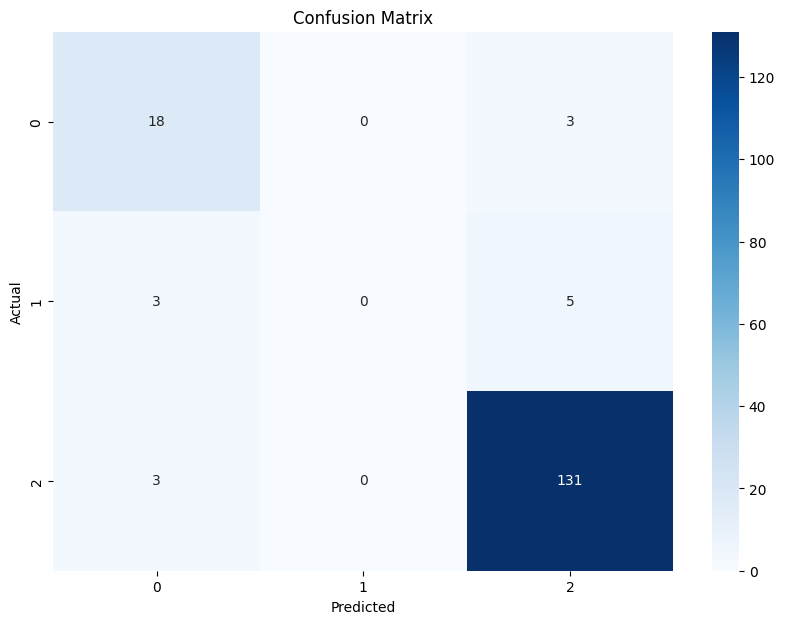

In [ ]:
from sklearn.metrics import confusion_matrix


all_y_pred = np.concatenate([y_pred_kfold])
all_y_true = np.concatenate([y_test_kfold])


average_cm = confusion_matrix(all_y_true, all_y_pred)

Plot_Confussion_Matrix(average_cm)

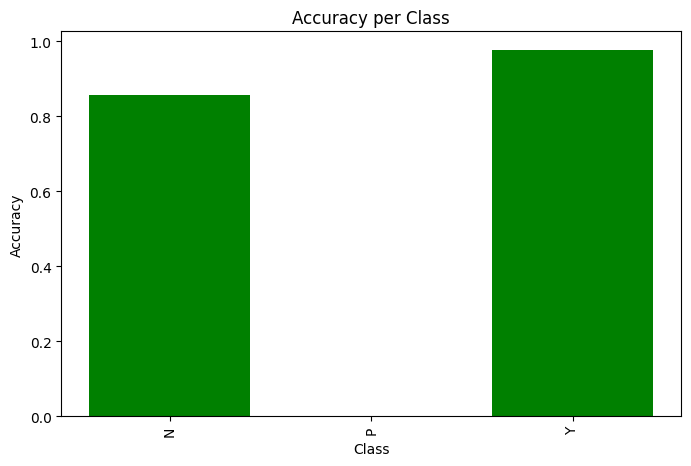

In [380]:
plot_accuracy_per_class(average_cm , class_names)

C:\Users\hanim\AppData\Local\Temp\ipykernel_44760\1203547386.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='PuBuGn')


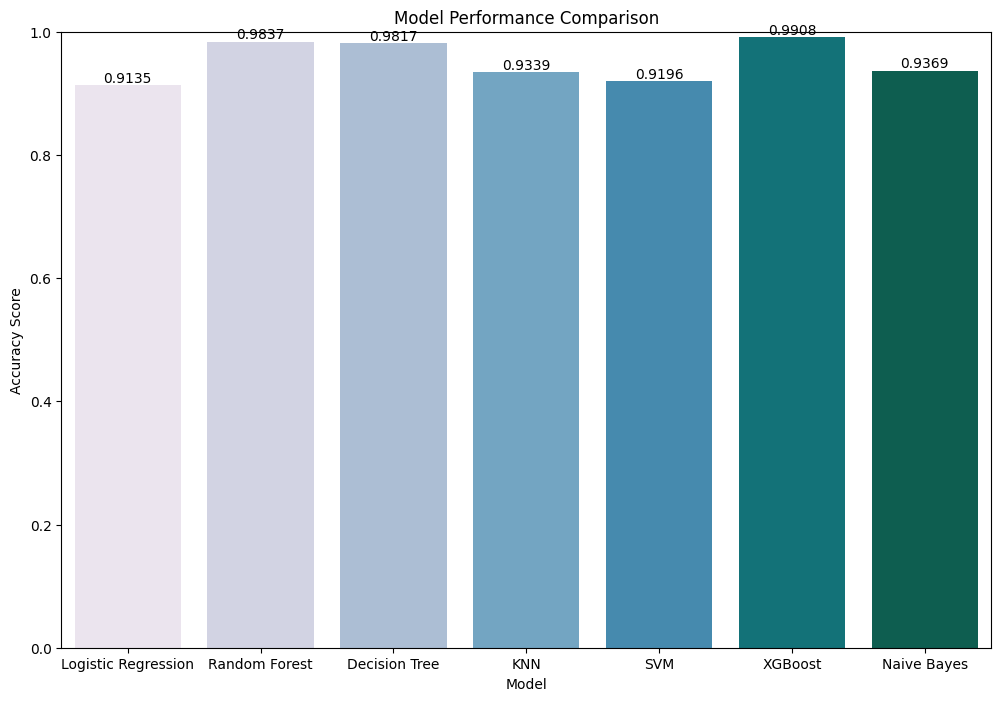

In [381]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN', 'SVM', 'XGBoost','Naive Bayes']
scores = [LR_average_accuracy, RF_average_accuracy, DT_average_accuracy, KNN_average_accuracy, Svm_average_accuracy, Xgb_average_accuracy , nb_average_accuracy]

plt.figure(figsize=(12, 8))
sns.barplot(x=models, y=scores, palette='PuBuGn')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)

for i, score in enumerate(scores):
    plt.text(i, score + 0.0001, f'{score:.4f}', ha='center', va='bottom', color='black')

plt.show()